# Score distribution analysis Part  2 : scoring and analysis
    -Within event score as simple mean and as pT weighted mean
    - pT weighted score defined as f(x) where x is the particle pT, f(x)=
        - 0.1 when pT<0.5 GeV
        - a.x when 0.5<pT<50
        - 1  when pT>50
    -Analysis plot of the two scores distribution over 100 events
    
#### The variance over 100 events is around 0.2% for the weighted score and 0.1% for the simple score

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys; sys.path.append('../../')
from trackml.scores import track2cost
from trackml.utils import data2tracksPT
from random import randint
import warnings
import csv
warnings.filterwarnings("ignore")
import trackml.dataset
path2data ='/path2dataEvents/'
N=5

### Event weight definition pT 

In [2]:
#Within Event weights by pT
#flat =0.1 before pT_linear_inf
#linear increasing between pT_linear_inf and pT_linear_sup
#flat=1 after pT_linear_sup
def pT_weighted_score(pT,pT_linear_inf=0.5,pT_linear_sup=5):
    w_min=0.1
    w_max=1.
    if pT<pT_linear_inf:
        return w_min
    elif pT < pT_linear_sup:
        return w_min+(w_max-w_min)*(pT-pT_linear_inf)/(pT_linear_sup-pT_linear_inf)
    else:
        return w_max

### Scoring of events : file by  file

In [3]:
#score events
score_Event=[]
weighted_score_Event=[]
events_weights=[]
cpT=[]

for i in range(N):
    #path to data
    idFile="%02d"%(i,)
    tracks,Hits,pT=data2tracksPT("event0000000"+str(idFile),path2data)     
    with open("event0000000"+str(idFile)+"-solution.csv", 'rb') as f:
      tracksFromFile = list(csv.reader(f))
    score=0
    weighted_score=0
    pT_weight=[]
    for s,reco in enumerate(tracksFromFile):
        reco=[int(u) for u in reco]
        w=pT_weighted_score(pT[s])
        cost=track2cost(reco,tracks[s])
        cost_weighted=cost*w      
        score+=cost
        weighted_score+=cost_weighted
        pT_weight.append(w)
    cpT.append(pT)
    weighted_score_Event.append(round(weighted_score/ len(tracks),3))
    score_Event.append(round(score/ len(tracks),3))
    events_weights.append(pT_weight)

### Event weights distribution : by pT weight

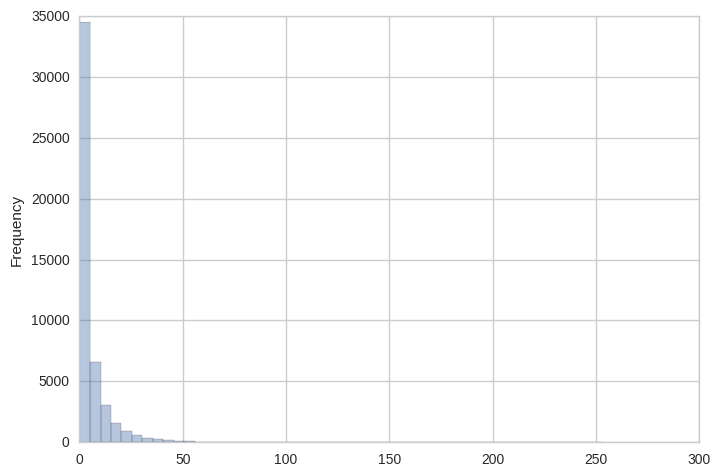

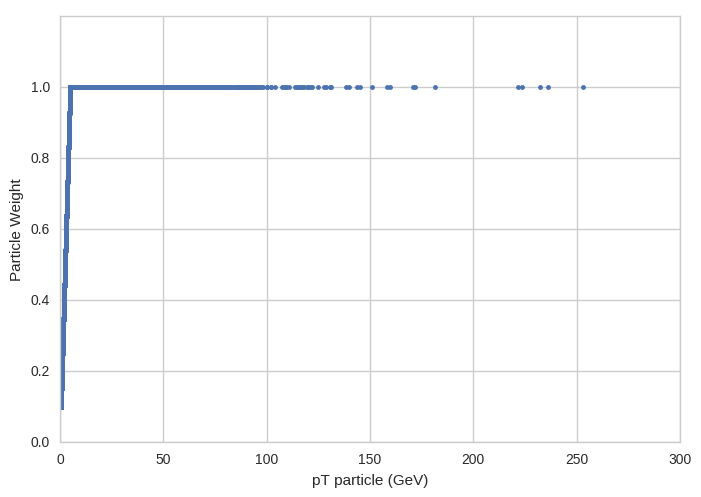

In [4]:
cpTs=np.concatenate((cpT))
sns.distplot(cpTs,kde=False)
plt.ylabel("Frequency")
plt.show()
Events_weights=np.concatenate((events_weights))
plt.plot(cpTs,Events_weights,".")
plt.ylabel("Particle Weight")
plt.xlabel("pT particle (GeV)")
plt.ylim(0,1.2)
plt.show()


### Non weighted score : simple mean distribution

In [5]:
print ("mean: ",np.mean(score_Event))
print ("std: ",np.std(score_Event))

('mean: ', 0.89319999999999999)
('std: ', 0.0011661903789690611)


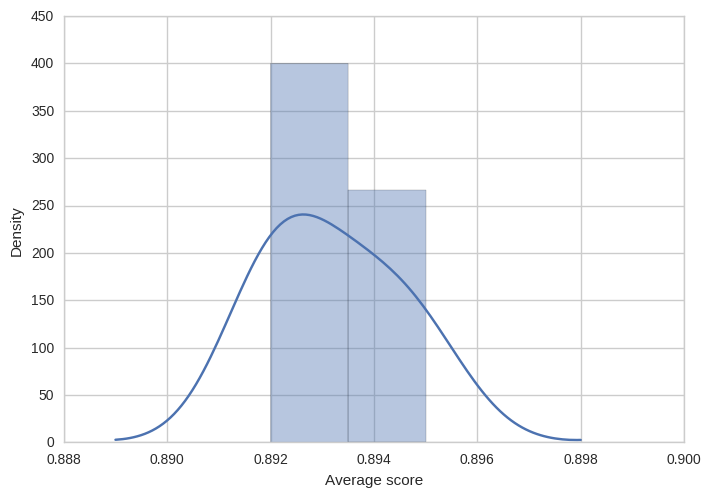

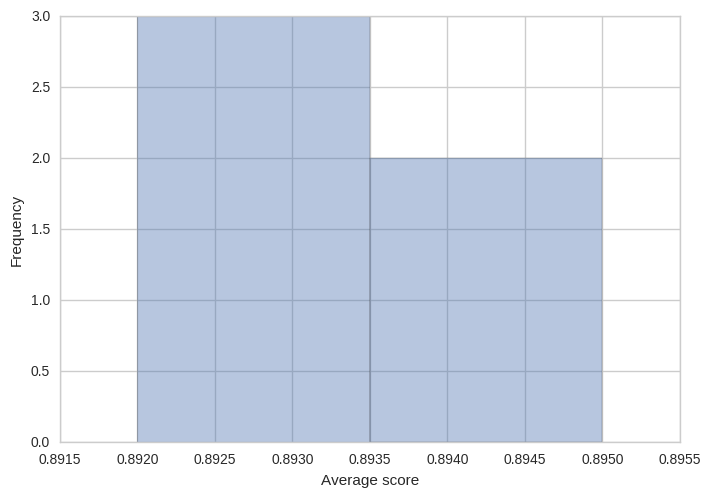

In [6]:
sns.distplot(score_Event)
plt.xlabel("Average score")
plt.ylabel("Density")
plt.show()
#
sns.distplot(score_Event,kde=False)
plt.xlabel("Average score")
plt.ylabel("Frequency")
plt.show()

### pT Weighted score distribution and variance

In [7]:
print ("mean: ",np.mean(weighted_score_Event))
print ("std: ",np.std(weighted_score_Event))

('mean: ', 0.46279999999999999)
('std: ', 0.0041665333311999191)


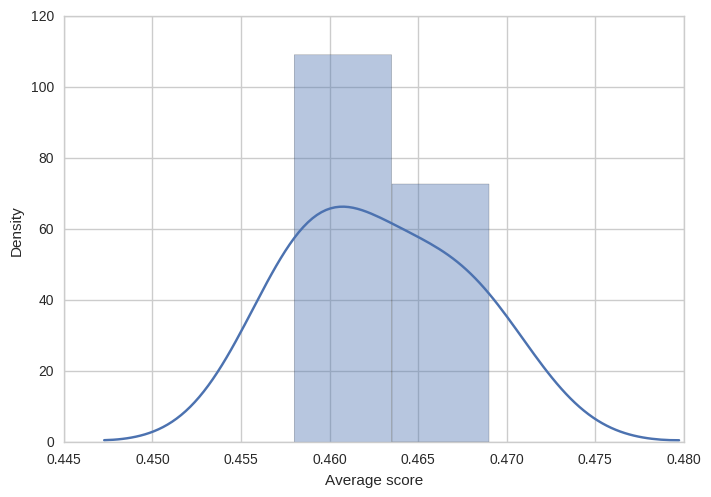

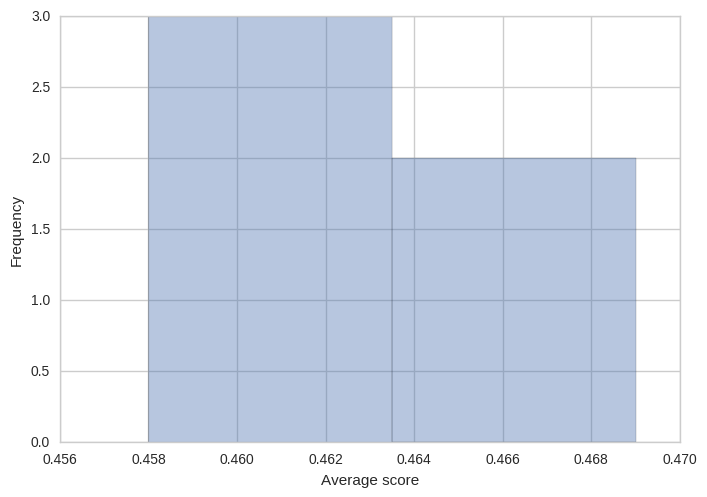

In [8]:
sns.distplot(weighted_score_Event)
plt.xlabel("Average score")
plt.ylabel("Density")
plt.show()
#
sns.distplot(weighted_score_Event,kde=False)
plt.xlabel("Average score")
plt.ylabel("Frequency")
plt.show()